In [1]:
import numpy as np
from IPython.display import display
from PIL import Image

In [2]:
img = Image.open('../figures/Iris_versicolor.jpg')

In [3]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

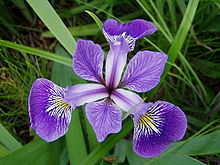

In [4]:
#Display image
img

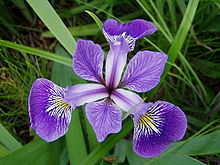

In [5]:
display(img)

In [6]:
#Splitting the image into its respective bands, i.e. Red, Green,
#and Blue for RGB
r,g,b = img.split()

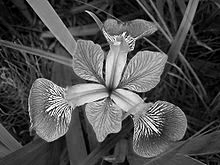

In [7]:
r

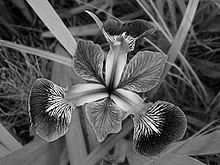

In [8]:
g

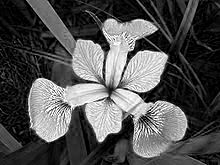

In [9]:
b

In [10]:
img1 = Image.open('../figures/Iris_versicolor.jpg').convert('L')

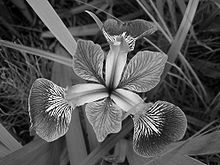

In [11]:
img1

In [12]:
img1.save('../../Iris_versicolor_BW.png','png')

In [13]:
img2 = Image.open('../../Iris_versicolor_BW.png')

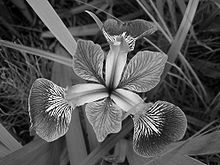

In [14]:
img2

In [15]:
numpy_img = np.array(img)

In [16]:
numpy_img.shape

(165, 220, 3)

In [17]:
numpy_img.transpose(2, 0, 1).shape

(3, 165, 220)

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

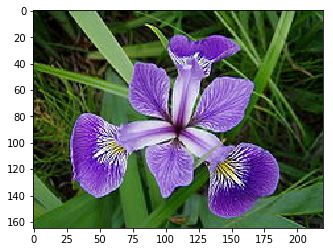

In [19]:
plt.imshow(numpy_img)

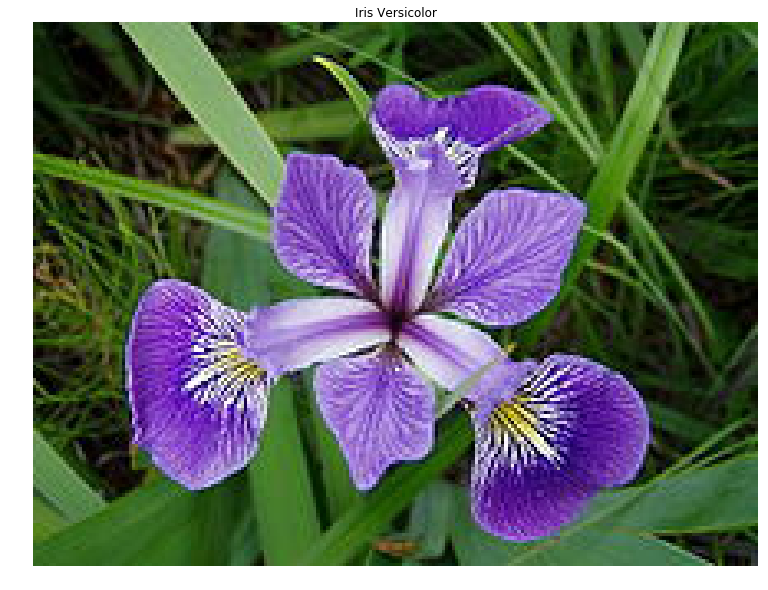

In [23]:
plt.figure(figsize=(15, 10))
plt.title("Iris Versicolor")
plt.imshow(numpy_img)
plt.axis('off')
plt.show()

In [20]:
numpy_img2 = np.array(img2)

In [21]:
numpy_img2.shape

(165, 220)

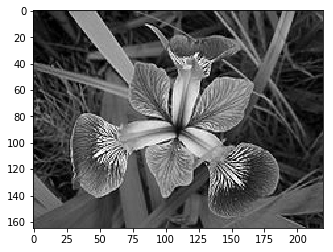

In [22]:
plt.imshow(numpy_img2, cmap='gray')